In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/My Drive')

In [ ]:
import pandas as pd


apple_training = pd.read_csv('apple_training.csv')

In [ ]:
apple_training.shape

(1260, 7)

In [ ]:
apple_training.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,53.974899,164873100
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.684914,140129500
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,54.982059,88241300
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.450539,148583400
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.136124,121039100


In [ ]:
# we are taking only the 'open' column 
apple_training = apple_training.iloc[:,1:2].values

In [ ]:
apple_training.shape

(1260, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

apple_training_scaled = scaler.fit_transform(apple_training)

In [ ]:
features_set = []
labels = []

for i in range(60,1260):
  features_set.append(apple_training_scaled[i-60:i,0])
  labels.append(apple_training_scaled[i,0])

In [ ]:
len(features_set)

1200

In [ ]:
import numpy as np
features_set, labels = np.array(features_set), np.array(labels)

In [ ]:
features_set.shape

(1200, 60)

In [ ]:
labels.shape

(1200,)

In [ ]:
features_set = np.reshape(features_set,(features_set.shape[0],features_set.shape[1],1))

In [ ]:
features_set.shape

(1200, 60, 1)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 


In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(units= 50, return_sequences=True, input_shape = (features_set.shape[1],1)))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
# RNN layer 2
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# RNN layer 3
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# RNN last layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units =1 ))

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
model.fit(features_set,labels,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 18ms/step - loss: 0.0440
Epoch 2/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 1s 20ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 6/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0041
Epoch 7/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0035
Epoch 10/100
38/38 [==============================] - 1s 16ms/step - loss: 0.0033
Epoch 11/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0035
Epoch 12/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0038
Epoch 13/100
38/38 [====

In [ ]:
apple_testing = pd.read_csv('apple_testing.csv')
apple_testing_processed = apple_testing.iloc[:,1:2].values # select only "open" column

In [ ]:
apple_testing_processed.shape

(20, 1)

Converting test data into right format
For each day of January 2018, we want our feature set to contain the opening stock prices for the previous 60 days because the model is trained like that, given previous 60 days values it will predict the next values. For the 1st of January, we need the stock prices for the previous 60 days. To do so, we need to concatenate our training data and test data before preprocessing

In [ ]:
apple_training_data = pd.read_csv('apple_training.csv')
apple_total = pd.concat((apple_training_data['Open'],apple_testing['Open']),axis=0) # concatenate row wise

In [ ]:
apple_total.shape

(1280,)

In [ ]:
apple_total.head()

0    72.932854
1    79.117142
2    78.268570
3    76.709999
4    74.571426
Name: Open, dtype: float64

Now let's prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means we need opening stock prices for the 20 test days for the month of January 2018 and the 60 stock prices from the last 60 days for the training set.

In [ ]:
test_inputs = apple_total[len(apple_total) - len(apple_testing) - 60:].values

In [ ]:
test_inputs.shape

(80,)

In [ ]:
len(apple_total)

1280

In [ ]:
len(apple_testing)

20

In [ ]:
test_inputs = test_inputs.reshape(-1,1)

In [ ]:
test_inputs.shape

(80, 1)

In [ ]:
test_inputs = scaler.transform(test_inputs)

In [ ]:
test_features = []
for i in range(60,80):
  test_features.append(test_inputs[i-60:i, 0])

In [ ]:
test_features = np.array(test_features)

In [ ]:
test_features.shape

(20, 60)

In [ ]:
test_features = np.reshape(test_features,(test_features.shape[0] , test_features.shape[1], 1))

In [ ]:
test_features.shape

(20, 60, 1)

In [ ]:
predictions = model.predict(test_features)

Since we scaled our data, the predictions made by the LSTM are also scaled. We need to reverse the scaled prediction back to their actual values. To do so, we can use the ìnverse_transform method of the scaler object we created during training.


In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions # appple stock price prediction for the 20 days in the test data

array([[168.33551],
       [168.20415],
       [168.68628],
       [169.45006],
       [170.26529],
       [171.02821],
       [171.58969],
       [171.60262],
       [171.51915],
       [171.82079],
       [172.70206],
       [173.38081],
       [174.25598],
       [174.98521],
       [175.14716],
       [174.9011 ],
       [174.54724],
       [173.7737 ],
       [172.42455],
       [170.715  ]], dtype=float32)

In [ ]:
len(predictions)

20

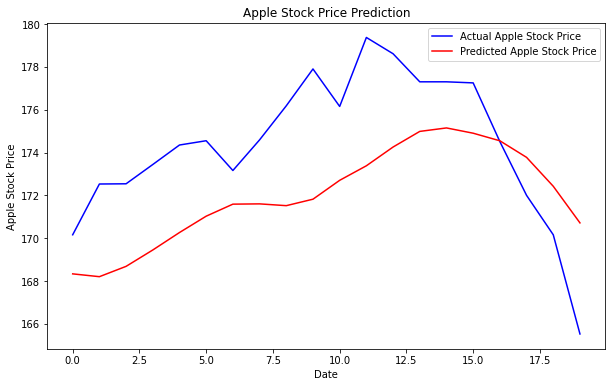

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))  
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')  
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')  
plt.title('Apple Stock Price Prediction')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  